<a href="https://colab.research.google.com/github/Sp-supriya/HCDS-Projects/blob/main/Project_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Build a Classification model for Drug Trails Dataset**

In [ ]:
!pip install pandas scikit-learn matplotlib seaborn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving drug_trials.csv to drug_trials.csv


In [ ]:
# Load the dataset (replace with your actual file path or dataset URL)
df = pd.read_csv("drug_trials.csv")

# Check the first few rows to understand the data structure
df.head()


,age,gender,dosage,side_effects,trial_duration,Trial_Success
0,25,M,20,NaN,6,1
1,34,F,40,Headache,6,0
2,45,M,30,Nausea,12,0
3,56,F,50,Fatigue,12,0
4,23,M,20,Dizziness,6,1


In [ ]:
# Handle missing values (if any)
df = df.dropna()

# Convert categorical variables to numeric (if applicable)
df = pd.get_dummies(df, drop_first=True)

# Assume the target column is 'Trial_Success' which is 1 for success, 0 for failure
X = df.drop('Trial_Success', axis=1)  # Features
y = df['Trial_Success']  # Target variable


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Initialize the classifier
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
classifier.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test_scaled)


Accuracy Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


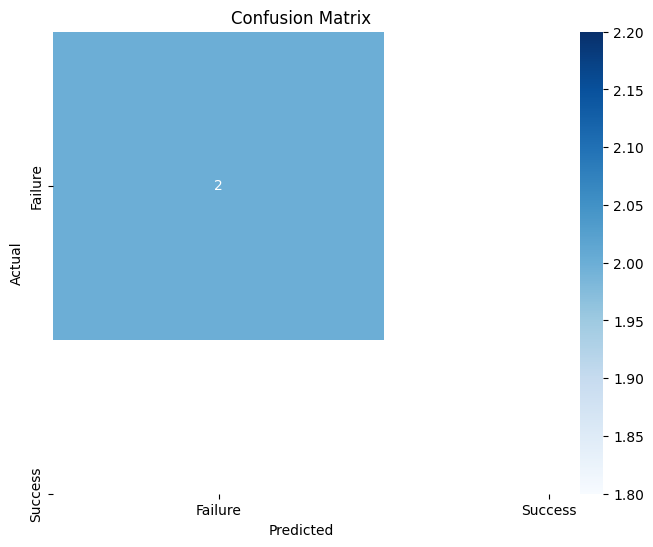


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [ ]:
# Accuracy score
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


In [ ]:
import joblib

# Save the model to a file
joblib.dump(classifier, 'drug_trial_model.pkl')


['drug_trial_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('drug_trial_model.pkl')

# Make predictions using the loaded model
new_predictions = loaded_model.predict(X_test_scaled)


Accuracy Score: 1.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


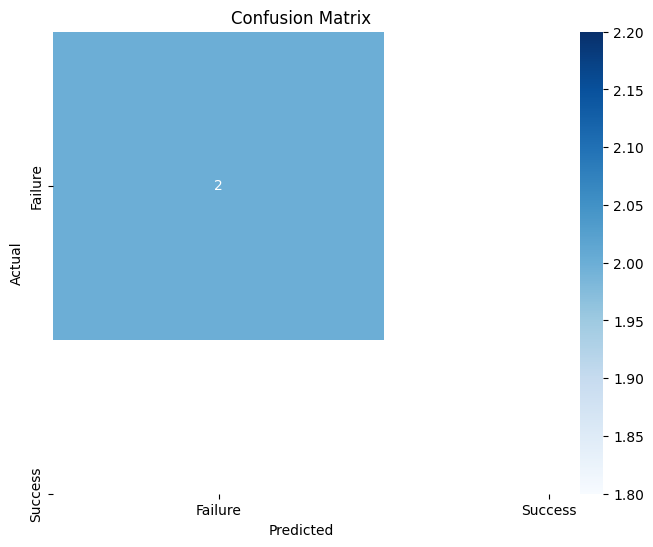


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         2

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



['drug_trial_model.pkl']

In [ ]:
# Install required libraries
!pip install pandas scikit-learn matplotlib seaborn

# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# Load the dataset
df = pd.read_csv("drug_trials.csv")
df.head()

# Data preprocessing
df = df.dropna()  # Drop rows with missing values
df = pd.get_dummies(df, drop_first=True)  # Encode categorical variables

# Define features (X) and target (y)
X = df.drop('Trial_Success', axis=1)
y = df['Trial_Success']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and train the model
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = classifier.predict(X_test_scaled)

# Evaluate the model
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Failure', 'Success'], yticklabels=['Failure', 'Success'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Save the model
joblib.dump(classifier, 'drug_trial_model.pkl')
